# Red Wine Quality Prediction Project

### Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value

### Objective: 
Use machine learning to determine which physiochemical properties make a wine 'good'!

### Variables
#### Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol

#### Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')

In [3]:
# Load Wine Dataset

data=pd.read_csv(r"C:\Users\JPGD\Documents\ANDREA GOMEZ\FLIP ROBO TECHNOLOGIES INTERNSHIP\Projects\Datasets\winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Checking the dimension of the dataset

data.shape

(1599, 12)

In [5]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


This dataset contains 1599 rows and 12 columns, out of which 1 is target variable ("quality") and the remaining 11 are independent variables.

In [6]:
# Checking the types of columns (non-graphical analysis)

data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are 2 different types of data present in the dataset (int64,float64).

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# checking the null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in the dataset.

<AxesSubplot:>

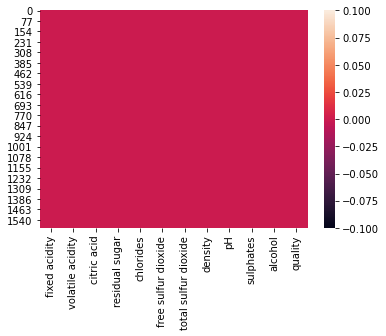

In [9]:
# Heatmap to visually check for null values

sns.heatmap(data.isnull())

The graph shows that there are no null values present in the dataset.

In [10]:
# Checking the number of unique values in each column

data.nunique().to_frame("No. of unique values")

,No. of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [11]:
# Checking the value counts of each column

for i in data.columns:
    print(data[i].value_counts())
    print("\n")

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
4.6      1
13.5     1
4.9      1
15.9     1
14.3     1
Name: fixed acidity, Length: 96, dtype: int64


0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
0.975     1
0.845     1
0.865     1
1.180     1
1.115     1
Name: volatile acidity, Length: 143, dtype: int64


0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
1.00      1
0.72      1
0.71      1
0.78      1
0.79      1
Name: citric acid, Length: 80, dtype: int64


2.00    156
2.20    131
1.80    129
2.10    128
1.90    117
       ... 
3.45      1
2.85      1
7.00      1
5.40      1
7.30      1
Name: residual sugar, Length: 91, dtype: int64


0.080    66
0.074    55
0.078    51
0.076    51
0.084    49
         ..
0.148     1
0.467     1
0.341     1
0.147     1
0.159     1
Name: chlorides, Length: 153, dtype: int64


6.0     138
5.0     104
10.0     79
15.0     78
12.0     75
7.0      71
9.0      62
16.0     61
17.0     60
11.

In [12]:
# Check duplicates in DataFrame

print("Total Duplicate Rows are:",data.duplicated().sum())

Total Duplicate Rows are: 240


In [13]:
# Select duplicate rows based on all columns

duplicates = data[data.duplicated(keep=False)]
duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [14]:
#duplicate.drop_duplicates()

In [15]:
# Remove duplicate rows

data.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Description of DataSet

In [16]:
# Statistical summary

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From the data description we can observe the following:
There are no missing values since the count of all columns after removing duplicates is the same 1599.
The median (50%) is lower than the mean in all columns except for density and quality columns, which means that the dataset is skewed to the right.
There is a big difference between 3rd quartile (75%) and max, which indicates that there are outliers present in the dataset.
There is not a big difference between fisrt quartile (25%) and minimum value, except for columns (free sulfur dioxide and quality), where outliers could be present.

In [17]:
# Checking the list of counts of target
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# Data Visualization

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


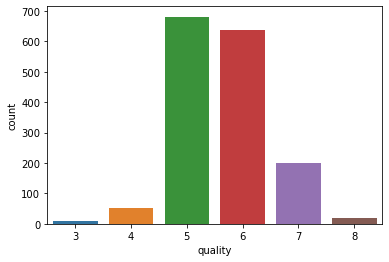

In [18]:
# Plotting the count corresponding to target variable values
print(data['quality'].value_counts())
ax=sns.countplot(x="quality",data=data)
plt.show()
#sns.catplot(x='quality',data=data,kind="count")

The quality values in the dataset are 3,4,5,6,7,8. Most of the data has a quality between 5 and 6, which denotes that most of the quality of the wines are in an intermediate level. 

In [19]:
# Visualize the relation of each feature/input variables with the quality of the wine

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

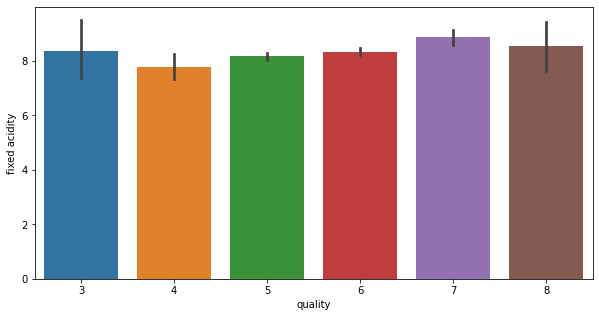

In [21]:
# fixed acidity Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='fixed acidity',data=data)

As per results, fixed acidity does not have a relevant impact on quality. 

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

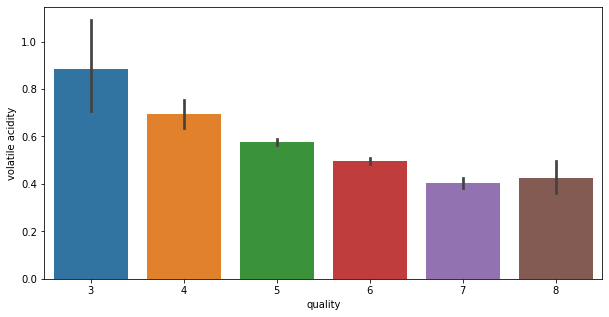

In [22]:
# volatile acidity Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='volatile acidity',data=data)

High quality wines have less volatile acidity. For the quality to be greater than 6, the votile acidity should be between 0.4-0-5.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

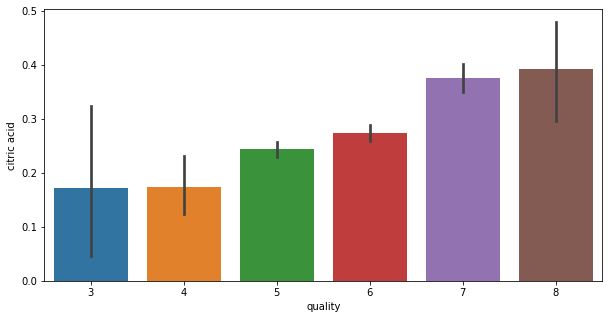

In [23]:
# citric acid Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='citric acid',data=data)

High quality wines have a greater citric acid, which should be greater than 0.3.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

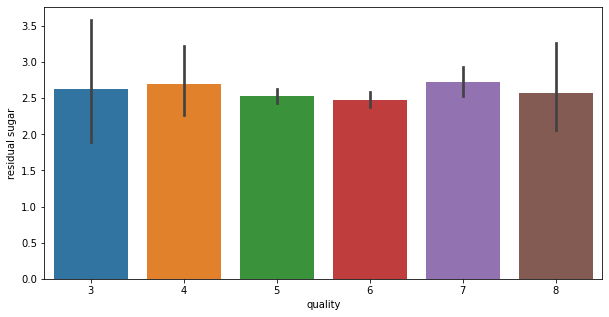

In [24]:
# residual sugar Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='residual sugar',data=data)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

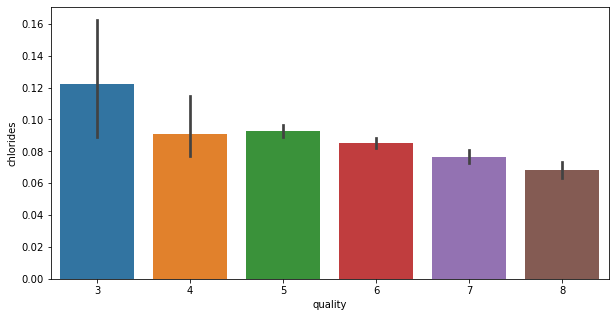

In [25]:
# chlorides Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='chlorides',data=data)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

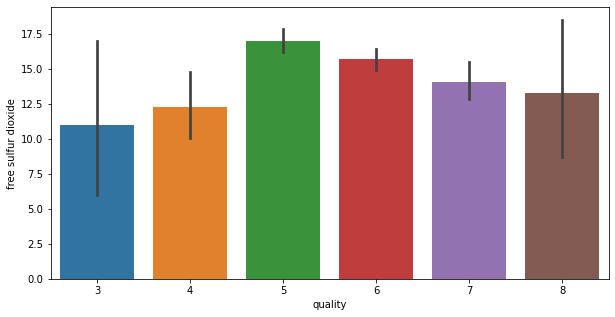

In [26]:
# free sulfur dioxide Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='free sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

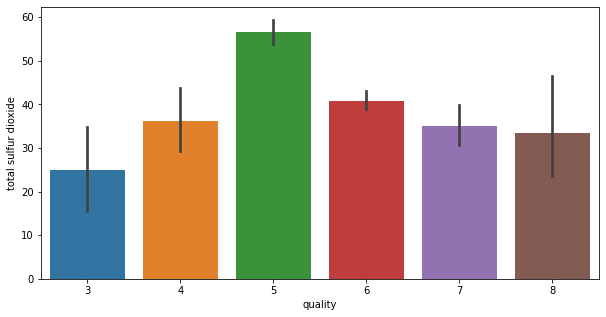

In [27]:
# total sulfur dioxide Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='total sulfur dioxide',data=data)

<AxesSubplot:xlabel='quality', ylabel='density'>

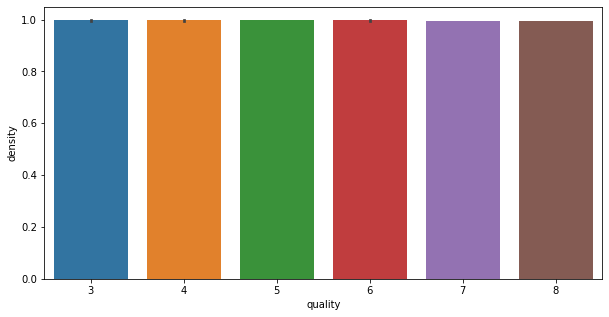

In [28]:
# density Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='density',data=data)

<AxesSubplot:xlabel='quality', ylabel='pH'>

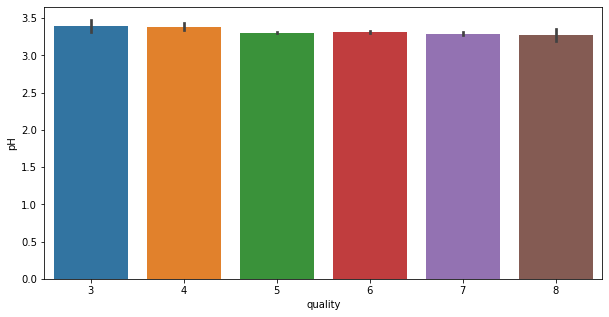

In [29]:
# pH Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='pH',data=data)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

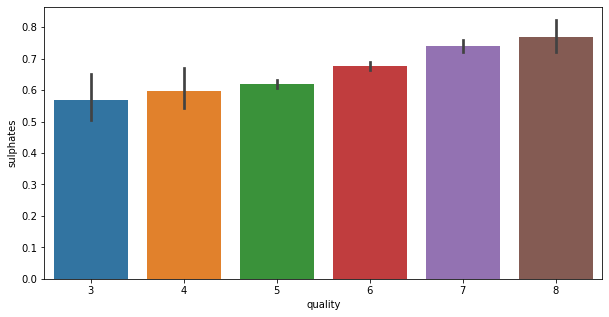

In [30]:
# sulphates Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='sulphates',data=data)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

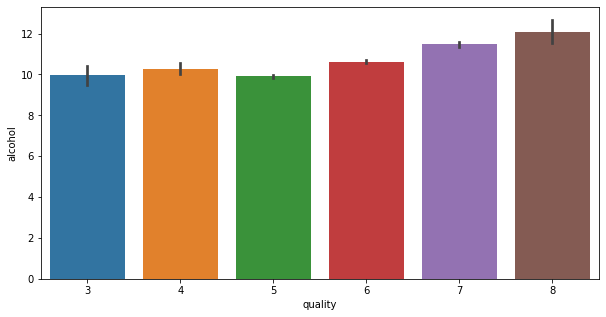

In [31]:
# alcohol Vs Quality
plot=plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='alcohol',data=data)

#### Insights from graphs:
    
According to this dataset, the quality of a wine is related to higher levels of: 
- citric acid: which should be greater than 0.3
- sulphates>0.7
- alcohol>11 but there is not a big difference when comparing to lower quality wines.

and lower levels of:
- volatile acidity < 0.475
- chlorides < 0.08

In [32]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:>

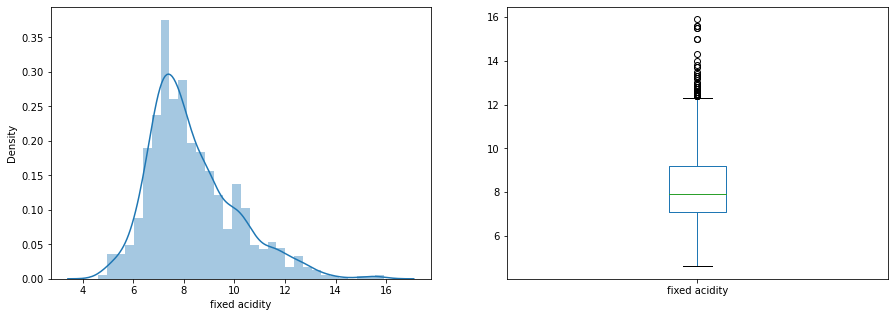

In [33]:
# Checking Data Distribution and outliers

plt.figure(2)
plt.subplot(121)
sns.distplot(data['fixed acidity'])
plt.subplot(122)
data['fixed acidity'].plot.box(figsize=(15,5))

<AxesSubplot:>

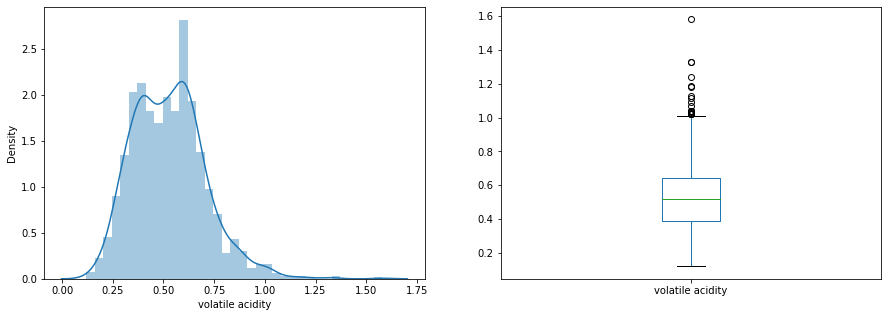

In [34]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['volatile acidity'])
plt.subplot(122)
data['volatile acidity'].plot.box(figsize=(15,5))

<AxesSubplot:>

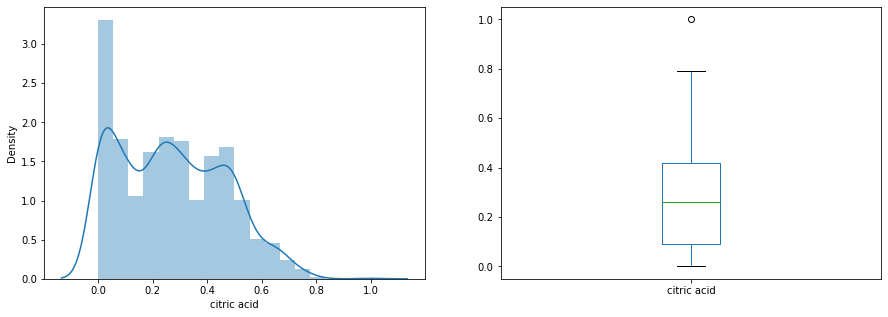

In [35]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['citric acid'])
plt.subplot(122)
data['citric acid'].plot.box(figsize=(15,5))

<AxesSubplot:>

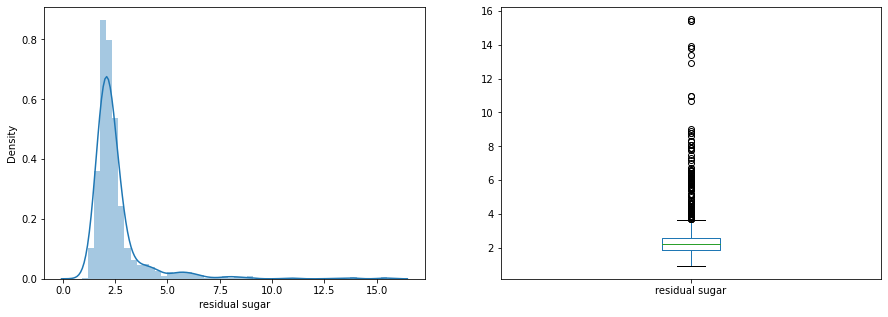

In [36]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['residual sugar'])
plt.subplot(122)
data['residual sugar'].plot.box(figsize=(15,5))

<AxesSubplot:>

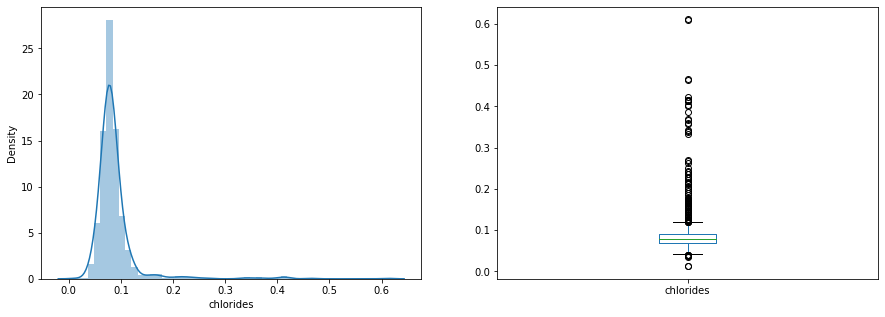

In [37]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['chlorides'])
plt.subplot(122)
data['chlorides'].plot.box(figsize=(15,5))

<AxesSubplot:>

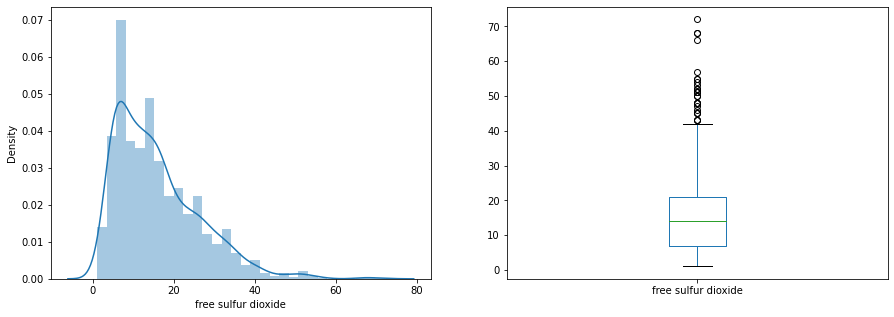

In [38]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['free sulfur dioxide'])
plt.subplot(122)
data['free sulfur dioxide'].plot.box(figsize=(15,5))

<AxesSubplot:>

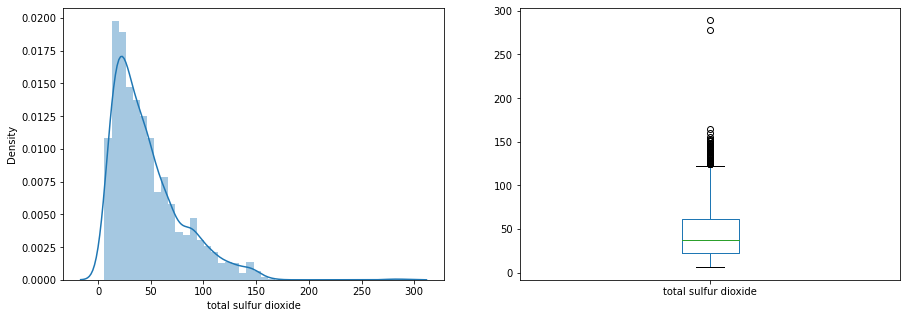

In [39]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['total sulfur dioxide'])
plt.subplot(122)
data['total sulfur dioxide'].plot.box(figsize=(15,5))

<AxesSubplot:>

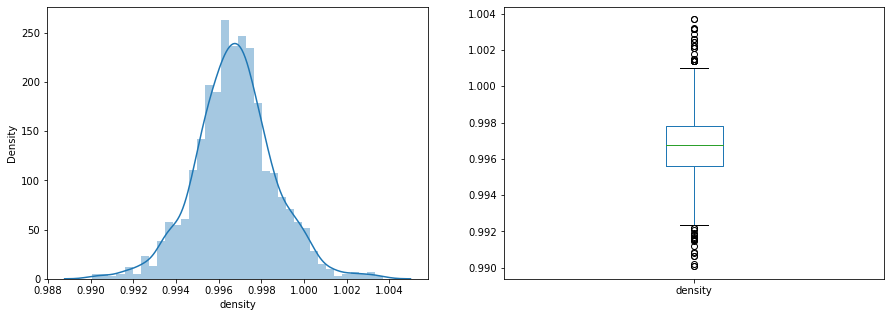

In [40]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['density'])
plt.subplot(122)
data['density'].plot.box(figsize=(15,5))

<AxesSubplot:>

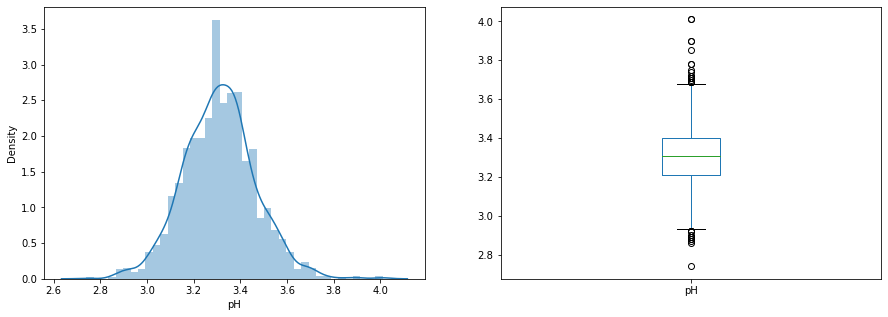

In [41]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['pH'])
plt.subplot(122)
data['pH'].plot.box(figsize=(15,5))

<AxesSubplot:>

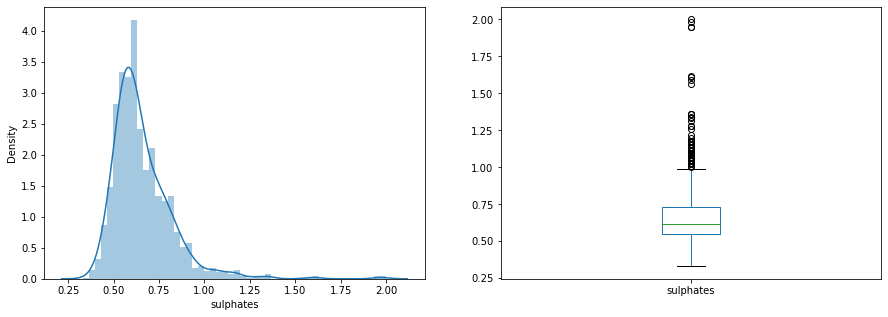

In [42]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['sulphates'])
plt.subplot(122)
data['sulphates'].plot.box(figsize=(15,5))

<AxesSubplot:>

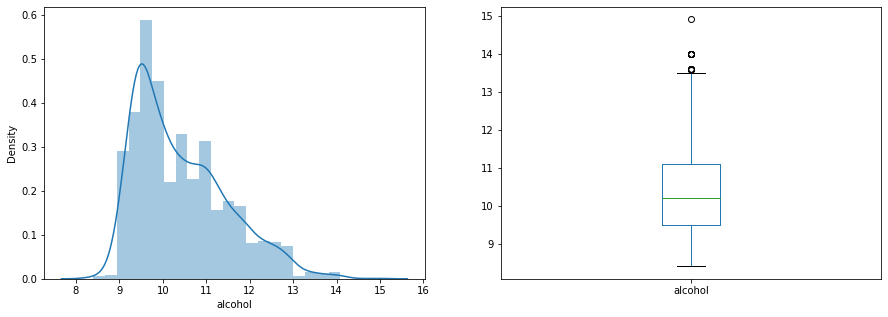

In [43]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['alcohol'])
plt.subplot(122)
data['alcohol'].plot.box(figsize=(15,5))

<AxesSubplot:>

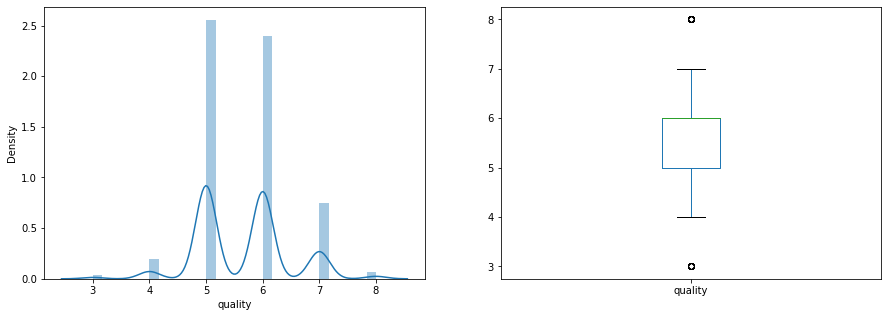

In [44]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data['quality'])
plt.subplot(122)
data['quality'].plot.box(figsize=(15,5))

## Data Preprocessing

In [45]:
# Remove Outliers

In [46]:
# Remove Outliers
from scipy.stats import zscore

out_features=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]
z=np.abs(zscore(out_features))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [47]:
# Threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [48]:
data1=data[(z<3).all(axis=1)]
data1.shape

(1451, 12)

In [49]:
# Shape of Old and New DataFrame
print("Old DataFrame - ",data.shape[0])
print("New DataFrame - ",data1.shape[0])

Old DataFrame -  1599
New DataFrame -  1451


In [50]:
print("Data Loss Percentage - ",((data.shape[0]-data1.shape[0])/data.shape[0]*100))

Data Loss Percentage -  9.255784865540964


In [51]:
import operator

# 1st quantile
Q1=out_features.quantile(0.25)


# 3rd quantile
Q3=out_features.quantile(0.75)

# IQR
IQR=Q3-Q1
data2=data[operator.invert(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1))]

In [52]:
data2.shape

(1179, 12)

In [53]:
print("Data Loss Percentage after removing outliers with IQR method - ",((data.shape[0]-data2.shape[0])/data.shape[0])*100)

Data Loss Percentage after removing outliers with IQR method -  26.26641651031895


I will choose the z-score method to remove outliers, since the %loss is lower than the IQR Method.

In [54]:
# Check the outliers 
#plt.figure(figsize=(20,25))
#p=1
#for i in data1:
    #if p<=13:
        #plt.subplot(5,4,p)
        #sns.boxplot(data1[i],palette="Set2_r")
        #plt.xlabel(i)
    #p+=1

#plt.show()

#### Checking for skewness

In [55]:
data1.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

After checking for skewness, it is easy to identify 3 variables with skewness > 1, meaning that they are extremely skewed. Thus, I will remove the skewness using cuberoot method.

In [56]:
# Removing skewness using cuberoot method

data1['residual sugar']=np.cbrt(data1['residual sugar'])
data1['chlorides']=np.cbrt(data1['chlorides'])
data1['total sulfur dioxide']=np.cbrt(data1['total sulfur dioxide'])

In [57]:
# Checking skewness again

data1.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.629524
chlorides               1.020246
free sulfur dioxide     0.869250
total sulfur dioxide    0.342621
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

It is noticeable that skewness has been reduced in 3 columns. This can also be seen in the graphs below.

<AxesSubplot:>

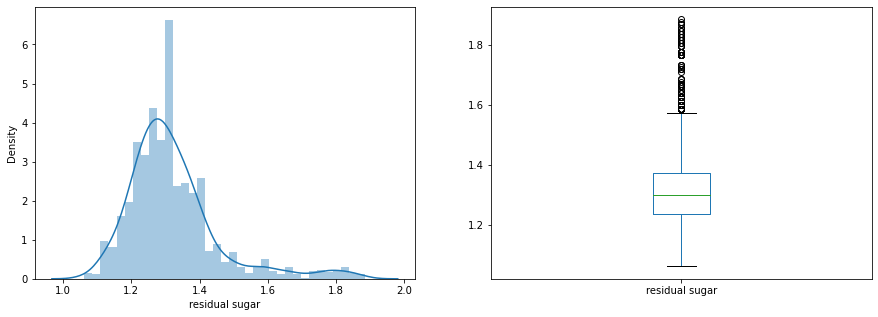

In [58]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data1['residual sugar'])
plt.subplot(122)
data1['residual sugar'].plot.box(figsize=(15,5))

<AxesSubplot:>

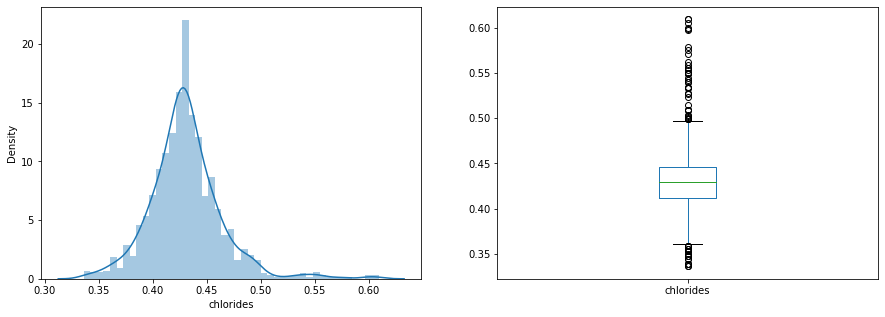

In [59]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data1['chlorides'])
plt.subplot(122)
data1['chlorides'].plot.box(figsize=(15,5))

<AxesSubplot:>

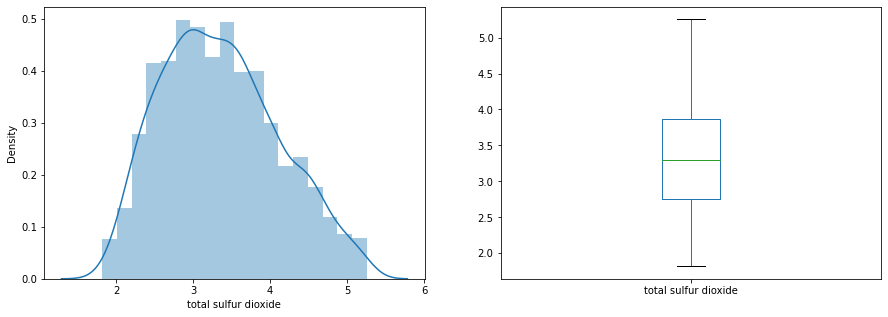

In [60]:
plt.figure(2)
plt.subplot(121)
sns.distplot(data1['total sulfur dioxide'])
plt.subplot(122)
data1['total sulfur dioxide'].plot.box(figsize=(15,5))

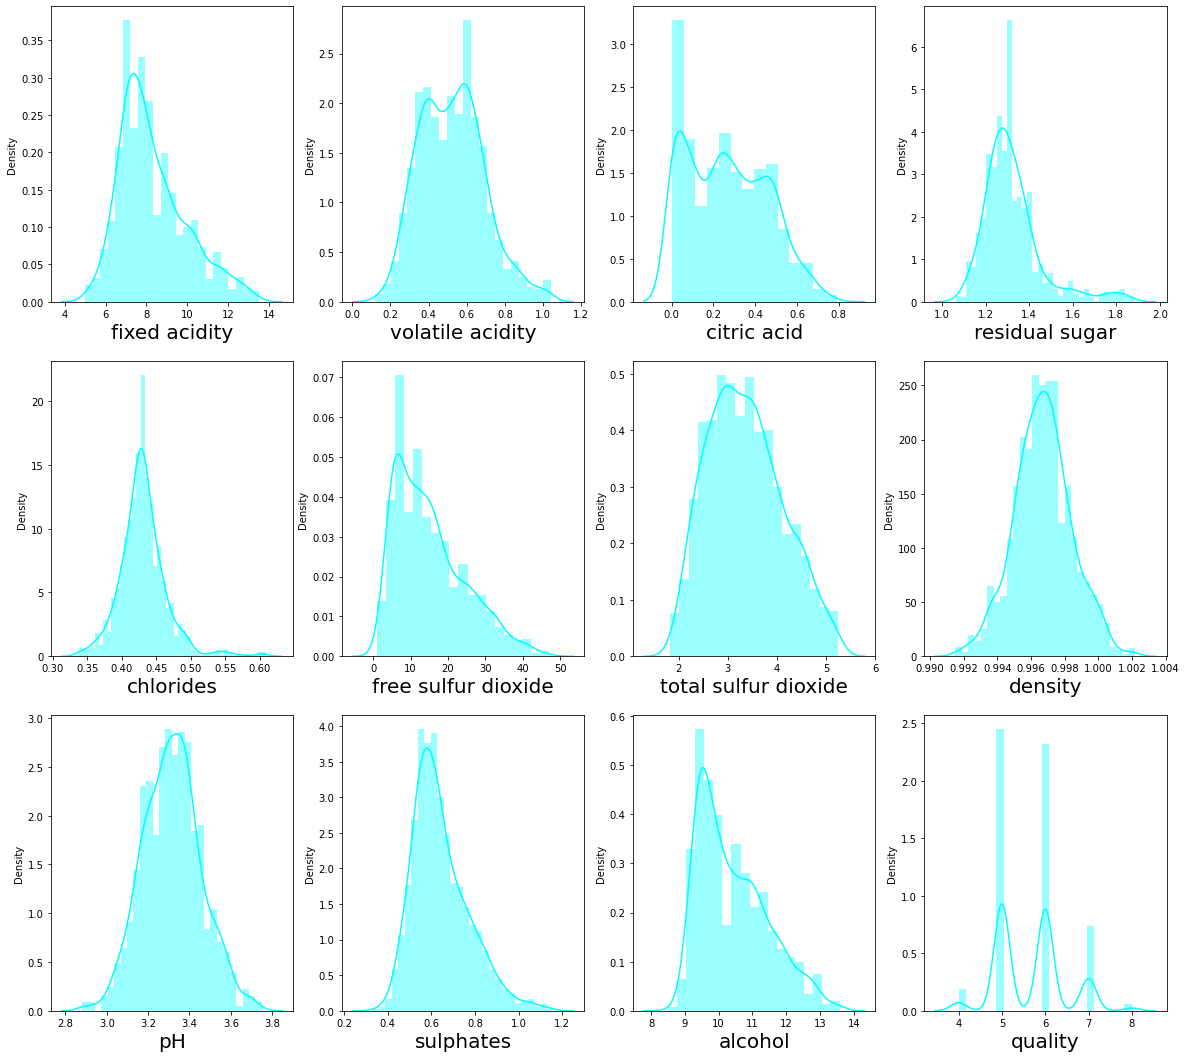

In [61]:
# let us visualize again

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data1:
    if plotnumber<=13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data1[column],color='aqua')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Correlation

In [62]:
# Find correlation between the data
correlation=data1.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.297150,0.698363,0.200618,0.203791,-0.148815,-0.105935,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.297150,1.000000,-0.589452,0.029540,0.080092,0.013943,0.108985,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,0.698363,-0.589452,1.000000,0.192647,0.101843,-0.074441,-0.018505,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,0.200618,0.029540,0.192647,1.000000,0.170433,0.009952,0.100312,0.374467,-0.078793,0.072251,0.163113,0.058058
chlorides,0.203791,0.080092,0.101843,0.170433,1.000000,-0.039415,0.069294,0.374142,-0.197501,0.004669,-0.241653,-0.130327
free sulfur dioxide,-0.148815,0.013943,-0.074441,0.009952,-0.039415,1.000000,0.711600,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.105935,0.108985,-0.018505,0.100312,0.069294,0.711600,1.000000,0.135713,0.022617,-0.016102,-0.267119,-0.220936
density,0.659927,-0.004957,0.371729,0.374467,0.374142,-0.037630,0.135713,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,-0.705572,0.251343,-0.520311,-0.078793,-0.197501,0.108831,0.022617,-0.312310,1.000000,-0.039082,0.135624,-0.082164
sulphates,0.200371,-0.348126,0.302815,0.072251,0.004669,0.055956,-0.016102,0.129896,-0.039082,1.000000,0.241636,0.386567


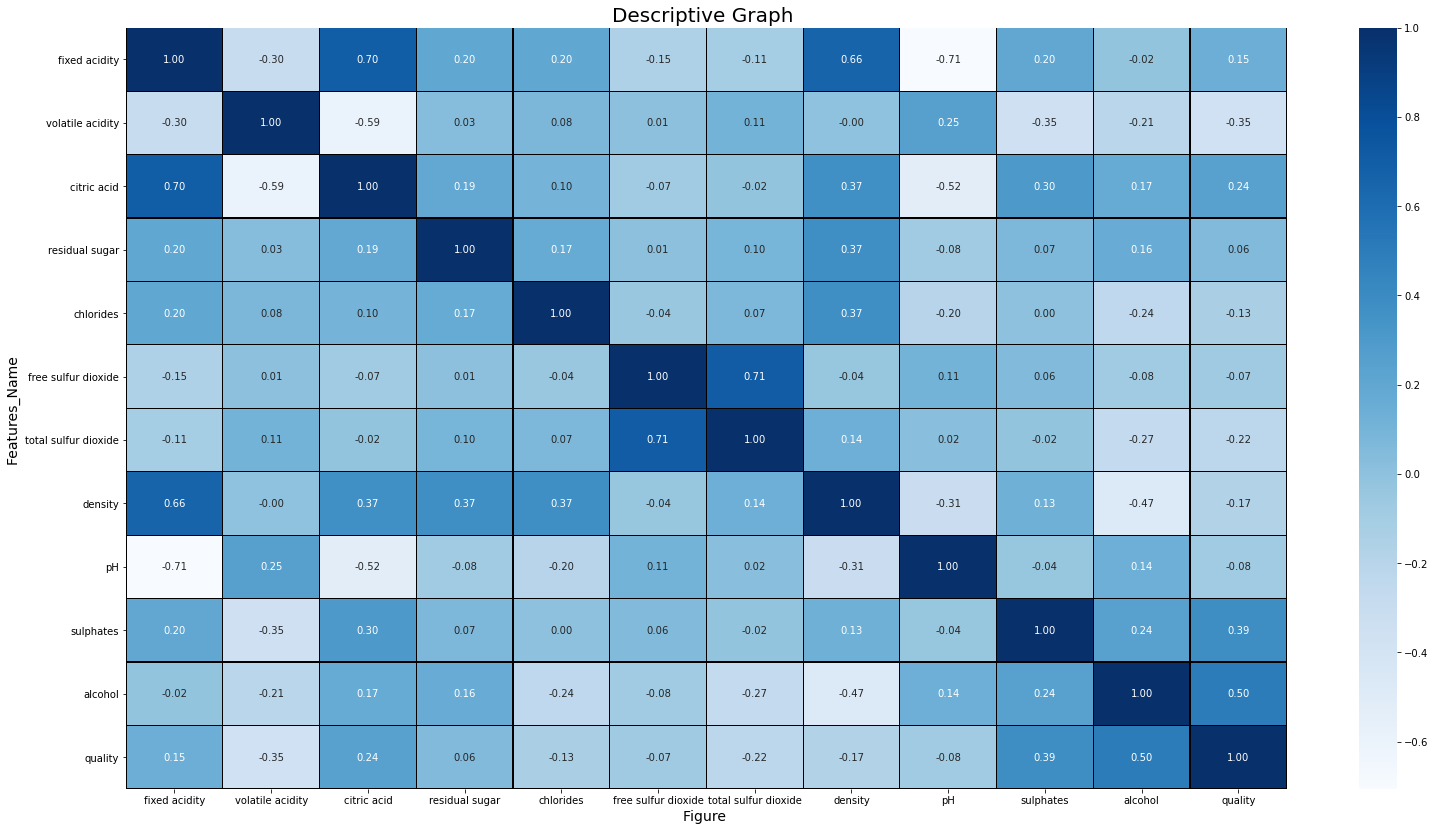

In [63]:
# Plot heatmap to visualize correlations
plt.figure(figsize=(26,14))
sns.heatmap(data1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('Figure ',fontsize=14)
plt.ylabel('Features_Name ',fontsize=14)
plt.title('Descriptive Graph ',fontsize=20)
plt.show()

From the graph above we confirm that there is a weak/moderate positive between quality and alcohol.

In [64]:
data1.corr()['quality'].sort_values()

volatile acidity       -0.353443
total sulfur dioxide   -0.220936
density                -0.167568
chlorides              -0.130327
pH                     -0.082164
free sulfur dioxide    -0.071202
residual sugar          0.058058
fixed acidity           0.145163
citric acid             0.243999
sulphates               0.386567
alcohol                 0.501501
quality                 1.000000
Name: quality, dtype: float64

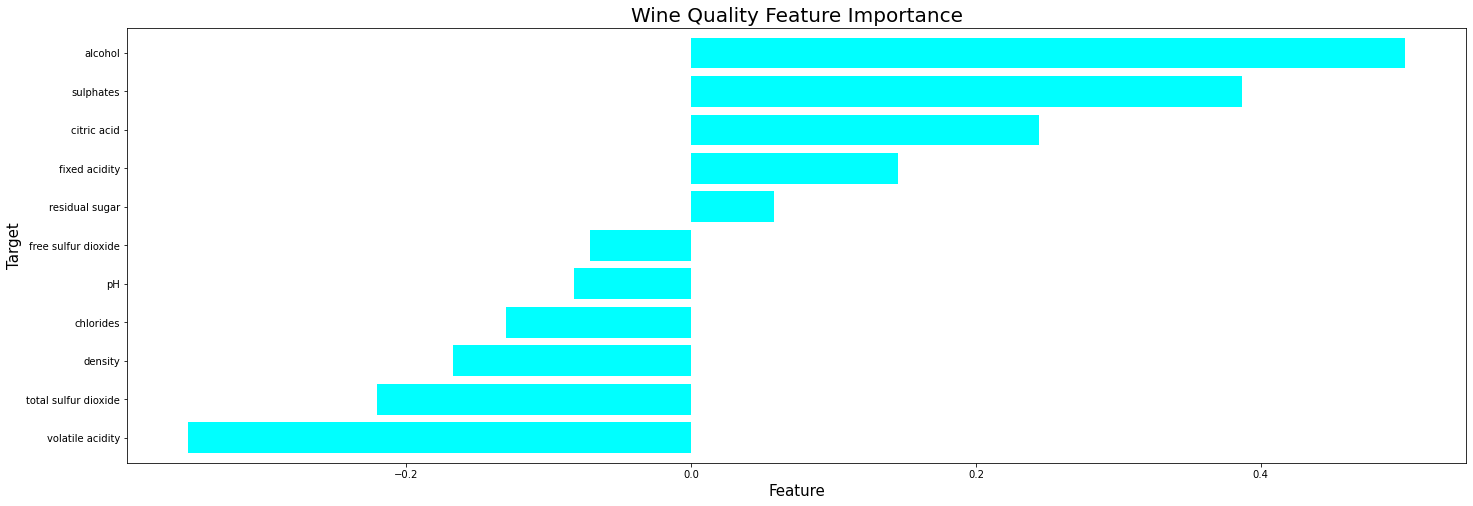

In [65]:
plt.figure(figsize=(24,8))
data1.corr()['quality'].sort_values().drop(['quality']).plot(kind='barh',color='aqua',width=0.8)
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('Wine Quality Feature Importance',fontsize=20)
plt.show()

From the Heatmap plot we can see there is a multicollinearity issue, since there is a positive correlation between some features.

##### Label Binarization

In [66]:
# Separating the independent and target variables into x and y
# Label Binarization

x=data1.drop("quality",axis=1)
y=data1["quality"].apply(lambda y_value:1 if y_value>=7 else 0)

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (1451, 11)
Label Dimension (1451,)


In [67]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.552930,1.050914,-1.390400,-0.610816,-0.210193,-0.441060,-0.154751,0.635485,1.375896,-0.636458,-0.999856
1,-0.309900,2.119336,-1.390400,0.390671,0.894816,1.063255,0.931518,0.052390,-0.821951,0.288353,-0.608174
2,-0.309900,1.407054,-1.180831,-0.013300,0.611409,-0.011256,0.559112,0.169009,-0.396561,0.057150,-0.608174
3,1.755851,-1.442071,1.543569,-0.610816,-0.265236,0.203646,0.737666,0.752103,-1.105544,-0.482323,-0.608174
4,-0.552930,1.050914,-1.390400,-0.610816,-0.210193,-0.441060,-0.154751,0.635485,1.375896,-0.636458,-0.999856
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.282019,0.457346,-0.971261,-0.454117,0.514207,1.815413,0.229486,-1.055489,0.950506,-0.482323,0.077270
1447,-1.464291,0.160562,-0.866477,-0.155737,-1.030019,2.567570,0.464838,-0.927209,1.446794,0.904894,0.762714
1448,-1.221261,-0.076865,-0.709300,-0.013300,-0.210193,1.493059,0.083586,-0.565690,0.737811,0.827826,0.566873
1449,-1.464291,0.724451,-0.761692,-0.454117,-0.265236,1.815413,0.229486,-0.723125,1.801286,0.519556,-0.216491


In [68]:
# https://labelyourdata.com/articles/machine-learning-for-wine-quality-prediction#:~:text=Predicting%20wine%20quality%20in%20machine,a%20prediction%20or%20classification%20model.

##### Variance Inflation Factor

In [69]:
# Checking Variance Inflation Factor

# Finding the Variance Inflation Factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()

vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,8.002754,fixed acidity
1,1.846786,volatile acidity
2,3.130694,citric acid
3,1.767068,residual sugar
4,1.221118,chlorides
5,2.222591,free sulfur dioxide
6,2.497755,total sulfur dioxide
7,6.838319,density
8,3.221977,pH
9,1.315057,sulphates


In [70]:
# Dropping TotalCharges column

x.drop("fixed acidity",axis=1,inplace=True)

In [71]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not

vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.842887,volatile acidity
1,2.813135,citric acid
2,1.512567,residual sugar
3,1.200157,chlorides
4,2.199288,free sulfur dioxide
5,2.392863,total sulfur dioxide
6,2.725938,density
7,1.523518,pH
8,1.301767,sulphates
9,2.382796,alcohol


By checking VIF values we can find features causing multicollinearity. Features like 'fixed acidity' and 'density' have high values denoting that they have high correlation with other features. Thus, I've dropped 'fixed acidity' feature, and as a consequence the 'density' feature has normalized.

In [72]:
# Checking if the data is balanced
# Checking the value count of target column
y.value_counts()

0    1250
1     201
Name: quality, dtype: int64

The data is not balanced. Given that it is a classification problem, I will balance the data using Oversampling Method.

##### Oversampling the data

In [73]:
# Oversampling the data

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [74]:
# Checking the value count of target column y1
y1.value_counts()

0    1250
1    1250
Name: quality, dtype: int64

## Modelling

#### Finding the best Random State

In [75]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, "at random_state",maxRS)

Best accuracy is  0.9626666666666667 at random_state 123


In [76]:
# Train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=162)

In [77]:
# Import Classification Algorithms

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [78]:
# Checking the accuracy for RandomForestClassifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8944954128440367
[[356  10]
 [ 36  34]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       366
           1       0.77      0.49      0.60        70

    accuracy                           0.89       436
   macro avg       0.84      0.73      0.77       436
weighted avg       0.89      0.89      0.88       436



The accuracy score using RandomForestClassifier is 90.14%

In [79]:
# Checking the accuracy for Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8646788990825688
[[349  17]
 [ 42  28]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       366
           1       0.62      0.40      0.49        70

    accuracy                           0.86       436
   macro avg       0.76      0.68      0.70       436
weighted avg       0.85      0.86      0.85       436



The accuracy score using Logistic Regression is 86.47%.

In [80]:
# Checking the accuracy for Support Vector Machine Classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8761467889908257
[[356  10]
 [ 44  26]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       366
           1       0.72      0.37      0.49        70

    accuracy                           0.88       436
   macro avg       0.81      0.67      0.71       436
weighted avg       0.86      0.88      0.86       436



The accuracy score using Support Vector Machine Classifier is 87.16%.

In [81]:
# Checking the accuracy for Gradient Boosting Classifier

GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8738532110091743
[[349  17]
 [ 38  32]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       366
           1       0.65      0.46      0.54        70

    accuracy                           0.87       436
   macro avg       0.78      0.71      0.73       436
weighted avg       0.86      0.87      0.86       436



The accuracy score using Gradient Boosting Classifier is 87.39%.

In [82]:
# Checking the accuracy for AdaBoost Classifier

ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8830275229357798
[[354  12]
 [ 39  31]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       366
           1       0.72      0.44      0.55        70

    accuracy                           0.88       436
   macro avg       0.81      0.71      0.74       436
weighted avg       0.87      0.88      0.87       436



The accuracy score using AdaBoost Classifier is 88.31%.

In [83]:
# Checking the accuracy for Bagging Classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9013761467889908
[[354  12]
 [ 31  39]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       366
           1       0.76      0.56      0.64        70

    accuracy                           0.90       436
   macro avg       0.84      0.76      0.79       436
weighted avg       0.89      0.90      0.89       436



The accuracy score using Bagging Classifier is 87.61%.

In [84]:
# Checking the accuracy for ExtraTreesClassifier

ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8830275229357798
[[352  14]
 [ 37  33]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       366
           1       0.70      0.47      0.56        70

    accuracy                           0.88       436
   macro avg       0.80      0.72      0.75       436
weighted avg       0.87      0.88      0.87       436



The accuracy score using ExtraTreesClassifier is 90.37%.

In [85]:
# Checking the accuracy for MultinomialNB

GNB=GaussianNB()
GNB.fit(x_train,y_train)
predGNB=GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))

0.8669724770642202
[[331  35]
 [ 23  47]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       366
           1       0.57      0.67      0.62        70

    accuracy                           0.87       436
   macro avg       0.75      0.79      0.77       436
weighted avg       0.88      0.87      0.87       436



The accuracy score using ExtraTreesClassifier is 86.24%.

### Cross Validation Score

In [86]:
# Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predRFC)-score.mean())

[0.88659794 0.85172414 0.87241379 0.87931034 0.87586207]
0.8731816565943833
Difference between Accuracy Score and Cross Validation Score is 0.02131375624965337


In [87]:
# Checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predLR)-score.mean())

[0.87972509 0.85172414 0.9        0.85172414 0.8862069 ]
0.8738760516648891
Difference between Accuracy Score and Cross Validation Score is -0.009197152582320345


In [88]:
# Checking cv score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predGB)-score.mean())

[0.87972509 0.85517241 0.88275862 0.84482759 0.86896552]
0.8662898447683375
Difference between Accuracy Score and Cross Validation Score is 0.007563366240836866


In [95]:
# Checking cv score for Support Vector Machine Classifier
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predsvc)-score.mean())

[0.88316151 0.85172414 0.9        0.85172414 0.87931034]
0.8731840265434293
Difference between Accuracy Score and Cross Validation Score is 0.00296276244739635


In [90]:
# Checking cv score for AdaBoosting Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predABC)-score.mean())

[0.89003436 0.84137931 0.87241379 0.81724138 0.85172414]
0.8545585969901646
Difference between Accuracy Score and Cross Validation Score is 0.02846892594561523


In [91]:
# Checking cv score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predBC)-score.mean())

[0.88316151 0.84137931 0.89655172 0.86896552 0.85862069]
0.8697357506813603
Difference between Accuracy Score and Cross Validation Score is 0.031640396107630475


In [92]:
# Checking cv score for ExtraTrees Classifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predET)-score.mean())

[0.88659794 0.86206897 0.88275862 0.86551724 0.87241379]
0.873871311766797
Difference between Accuracy Score and Cross Validation Score is 0.009156211168982797


In [93]:
# Checking cv score for for MultinomialNB
score=cross_val_score(GNB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy Score and Cross Validation Score is",accuracy_score(y_test,predGNB)-score.mean())

[0.88316151 0.81724138 0.88965517 0.76551724 0.88275862]
0.8476667851641189
Difference between Accuracy Score and Cross Validation Score is 0.01930569190010134


Support Vector Machine Classifier is the best model given that the difference between Accuracy Score and Cross Validation is the least.

### Hyperparameter Tuning

In [101]:
# To increase the performance of the model
# Support Vector Machine Classifier

from sklearn.model_selection import GridSearchCV

parameters={'C':[0.1,1,100,1000],
           'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
           'degree':[1,2,3,4,5,6],
           'gamma':['scale', 'auto'],
           'decision_function_shape':['ovo', 'ovr']}

In [102]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [103]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [105]:
GCV.best_params_

{'C': 1,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly'}

In [120]:
# Final Model

Final_model=SVC(C=1,decision_function_shape='ovo',degree=5,gamma='auto',kernel='poly')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

87.1559633027523


### Plotting ROC and compare AUC for the best model

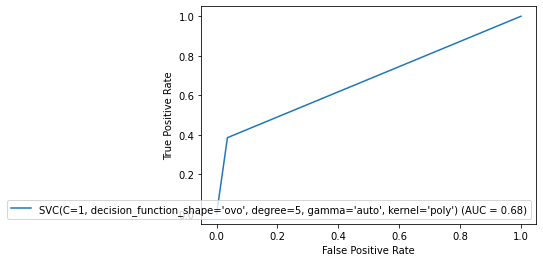

In [121]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred) #fpr=false positive rate, tpr= true positive rate
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Findings: Even if the Support Vector Machine Classifier was the best model when looking at the difference between Accuracy Score and Cross Validation Score. After Hyperparameter tuning with a AUC=0.68, it is not performing as expected.

### Saving the model

In [109]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model,"Red Wine Quality Prediction_Analysis.pkl")

['Red Wine Quality Prediction_Analysis.pkl']

### Predicting based on saved model

In [110]:
# Loading the saved model and getting the predictions

model=joblib.load("Red Wine Quality Prediction_Analysis.pkl")

# Prediction
prediction=model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
Here we can see the predicted quality of wines.

In [111]:
# Checking if the model is giving the correct prediction

a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
431,1,0
432,0,0
433,0,0
434,0,0
